# Predict the S&P Price
## EECS3401 - Group 11 - W2024

Authors: Ankit Modhera, Arman Ahmed, Calvin Kattathara, Leo Graziosi

In [37]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import zipfile
import os

In [38]:
# Define the directory containing the data
data_directory = "Data"

# Find the first zip file in the directory
zip_file_name = next((f for f in os.listdir(data_directory) if f.endswith('.zip')), None)
if not zip_file_name:
    raise FileNotFoundError("No zip file found in the data directory.")

# Process the zip file
print(f"Processing zip file: {zip_file_name}")
with zipfile.ZipFile(os.path.join(data_directory, zip_file_name), 'r') as zip_file:
    # Identify CSV files in the zip archive
    csv_files = [f for f in zip_file.namelist() if f.endswith('.csv')]
    if not csv_files:
        raise FileNotFoundError("No CSV files found in the zip archive.")

    # Initialize dictionaries to store DataFrames
    data_frames = {}

    # Extract and load each CSV file
    for csv_file in csv_files:
        with zip_file.open(csv_file) as file:
            data_frames[csv_file] = pd.read_csv(file)

# Accessing the DataFrames by their filenames ('sp500_companies.csv', 'sp500_index.csv', 'sp500_stocks.csv')
# Replace 'sp500_companies.csv' with the actual filenames
df_sp500_companies = data_frames.get('sp500_companies.csv')
df_sp500_index = data_frames.get('sp500_index.csv')
df_sp500_stocks = data_frames.get('sp500_stocks.csv')

Processing zip file: Data-2024-03-16.zip


In [39]:
# Companies dataset
df_sp500_companies

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,416.420,3094183936000,1.184270e+11,0.176,Redmond,WA,United States,221000.0,Microsoft Corporation develops and supports so...,0.065276
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,172.620,2665580593152,1.301090e+11,0.021,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.056234
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,878.365,2195912523776,3.448000e+10,2.653,Santa Clara,CA,United States,29600.0,"NVIDIA Corporation provides graphics, and comp...",0.046326
3,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,174.420,1811770245120,8.551500e+10,0.139,Seattle,WA,United States,1525000.0,"Amazon.com, Inc. engages in the retail sale of...",0.038222
4,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,142.170,1761315782656,1.001720e+11,0.135,Mountain View,CA,United States,182502.0,Alphabet Inc. offers various products and plat...,0.037157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,NYQ,CMA,Comerica Incorporated,Comerica Incorporated,Financial Services,Banks - Regional,49.490,6556930560,NaN,-0.220,Dallas,TX,United States,7496.0,"Comerica Incorporated, through its subsidiarie...",0.000138
499,NMS,ZION,Zions Bancorporation N.A.,"Zions Bancorporation, National Association",Financial Services,Banks - Regional,39.790,5872964608,NaN,-0.119,Salt Lake City,UT,United States,9679.0,"Zions Bancorporation, National Association pro...",0.000124
500,NYQ,VFC,V.F. Corporation,V.F. Corporation,Consumer Cyclical,Apparel Manufacturing,14.780,5746700288,1.068373e+09,-0.162,Denver,CO,United States,19800.0,"V.F. Corporation, together with its subsidiari...",0.000121
501,NYQ,WHR,Whirlpool Corporation,Whirlpool Corporation,Consumer Cyclical,"Furnishings, Fixtures & Appliances",105.120,5725056000,1.477000e+09,0.034,Benton Harbor,MI,United States,59000.0,Whirlpool Corporation manufactures and markets...,0.000121


In [40]:
# Index dataset
df_sp500_index

,Date,S&P500
0,2014-03-17,1858.83
1,2014-03-18,1872.25
2,2014-03-19,1860.77
3,2014-03-20,1872.01
4,2014-03-21,1866.52
...,...,...
2513,2024-03-11,5117.94
2514,2024-03-12,5175.27
2515,2024-03-13,5165.31
2516,2024-03-14,5150.48


In [41]:
# Stocks dataset
df_sp500_stocks

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3043700.0
1,2010-01-05,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2847000.0
2,2010-01-06,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5268500.0
3,2010-01-07,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4470100.0
4,2010-01-08,MMM,60.247749,84.320000,84.320000,83.300003,83.690002,3405800.0
...,...,...,...,...,...,...,...,...
1797717,2024-03-11,ZTS,183.490005,183.490005,183.990005,180.419998,182.619995,3383500.0
1797718,2024-03-12,ZTS,181.350006,181.350006,183.830002,180.940002,183.649994,2598400.0
1797719,2024-03-13,ZTS,176.229996,176.229996,182.970001,175.990005,181.600006,5947400.0
1797720,2024-03-14,ZTS,173.880005,173.880005,177.490005,170.720001,177.490005,6432600.0


In [42]:
# Number of distinct companies in the S&P since 2014
print(f"There are {df_sp500_companies['Symbol'].nunique()} companies which were in the S&P since the year 2010\n")

# Find the percentage of the S&P 500 each sector makes up
# Count the occurrences of each unique sector
sector_counts = df_sp500_companies['Sector'].value_counts()
total_entries = len(df_sp500_companies)
sector_percentages = (sector_counts / total_entries) * 100 # Convert the counts to percentages
print("% of the S&P 500 each sector makes up")
print(sector_percentages)

There are 503 companies which were in the S&P since the year 2010

% of the S&P 500 each sector makes up
Sector
Technology                14.910537
Industrials               14.512922
Financial Services        13.320080
Healthcare                12.922465
Consumer Cyclical         11.530815
Consumer Defensive         7.355865
Real Estate                6.163022
Utilities                  5.964215
Energy                     4.572565
Communication Services     4.373757
Basic Materials            4.373757
Name: count, dtype: float64


In [43]:
# Feature engineering: Combine full dataset with technical indicators
df_sp500_full = df_sp500_index

# Convert 'Date' column to datetime format and set as the index for easier time series operations
df_sp500_full['Date'] = pd.to_datetime(df_sp500_full['Date'])
df_sp500_full.set_index('Date', inplace=True)

# Simple Moving Averages (SMA) are used to smooth out price data over a specified period of time, 
# giving a visual representation of the average price over that period. They can help identify trends and reversals.
# Calculate 10, 30, and 90-day Simple Moving Averages for the S&P500 index.
df_sp500_full['10d_SMA'] = df_sp500_full['S&P500'].rolling(window=10).mean()
df_sp500_full['30d_SMA'] = df_sp500_full['S&P500'].rolling(window=30).mean()
df_sp500_full['90d_SMA'] = df_sp500_full['S&P500'].rolling(window=90).mean()

# The Moving Average Convergence Divergence (MACD) is a trend-following momentum indicator 
# that shows the relationship between two moving averages of a security’s price.
# Here, we're calculating MACD variations by comparing different SMAs to each other.
df_sp500_full['MACD_short_medium'] = df_sp500_full['10d_SMA'] - df_sp500_full['30d_SMA']
df_sp500_full['MACD_medium_long'] = df_sp500_full['30d_SMA'] - df_sp500_full['90d_SMA']
df_sp500_full['MACD_short_long'] = df_sp500_full['10d_SMA'] - df_sp500_full['90d_SMA']

# Aggregate the trading volume of all stocks contributing to the S&P 500 for each day
df_volume_agg = df_sp500_stocks.groupby('Date')['Volume'].sum().reset_index()
df_volume_agg['Date'] = pd.to_datetime(df_volume_agg['Date']) # Ensure the 'Date' column is of datetime type
df_volume_agg.set_index('Date', inplace=True)

# Merging this aggregated volume data with the df_sp500_full DataFrame using index
df_sp500_full = pd.merge(df_sp500_full, df_volume_agg, left_index=True, right_index=True, how='left')

# Calculate 10 and 30-day Moving Averages for the aggregated trading volume.
# This can help to identify trends in trading activity, separate from price movements.
df_sp500_full['10d_Volume_MA'] = df_sp500_full['Volume'].rolling(window=10).mean()
df_sp500_full['30d_Volume_MA'] = df_sp500_full['Volume'].rolling(window=30).mean()

# Market Direction indicates the daily price movement direction where 1 for an increase, -1 for a decrease, and 0 for no change.
# This can be useful for momentum strategies.
df_sp500_full['Market_Direction'] = np.sign(df_sp500_full['S&P500'].diff()) # 1 if market went up, -1 if market went down

# On-Balance Volume (OBV) uses volume flow to predict changes in stock price. The idea is that volume precedes price movement,
# so if a security is seeing an increasing OBV, it is generally considered bullish; if it is seeing decreasing OBV, it is generally considered bearish.
df_sp500_full['OBV'] = (df_sp500_full['Market_Direction'] * df_sp500_full['Volume']).cumsum()

# The Volume Oscillator shows the difference between two moving averages of volume.
# It helps identify whether the trading volume is increasing or decreasing.
df_sp500_full['Volume_Oscillator'] = df_sp500_full['10d_Volume_MA'] - df_sp500_full['30d_Volume_MA']


# Trim the first 90 days to allow for the moving averages
df_sp500_full = df_sp500_full.iloc[89:]

# Display full dataframe
df_sp500_full

,S&P500,10d_SMA,30d_SMA,90d_SMA,MACD_short_medium,MACD_medium_long,MACD_short_long,Volume,10d_Volume_MA,30d_Volume_MA,Market_Direction,OBV,Volume_Oscillator
Date,,,,,,,,,,,,,
2014-07-23,1987.01,1974.471,1963.735667,1908.897333,10.735333,54.838333,65.573667,2.340862e+09,2.305126e+09,2.243913e+09,1.0,4.488740e+10,6.121326e+07
2014-07-24,1987.98,1976.801,1965.205333,1910.332333,11.595667,54.873000,66.468667,2.537793e+09,2.346201e+09,2.261311e+09,1.0,4.742519e+10,8.488993e+07
2014-07-25,1978.34,1977.878,1966.813000,1911.511111,11.065000,55.301889,66.366889,2.312308e+09,2.390849e+09,2.259928e+09,-1.0,4.511289e+10,1.309215e+08
2014-07-28,1978.91,1978.059,1968.238000,1912.823778,9.821000,55.414222,65.235222,2.235974e+09,2.402401e+09,2.266672e+09,1.0,4.734886e+10,1.357297e+08
2014-07-29,1969.95,1977.726,1969.310333,1913.912000,8.415667,55.398333,63.814000,2.305776e+09,2.379022e+09,2.272497e+09,-1.0,4.504308e+10,1.065256e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-11,5117.94,5109.464,5026.273667,4761.557111,83.190333,264.716556,347.906889,2.212667e+09,2.527104e+09,2.528025e+09,-1.0,3.287279e+11,-9.207970e+05
2024-03-12,5175.27,5119.173,5034.518333,4772.462333,84.654667,262.056000,346.710667,2.320705e+09,2.543175e+09,2.527502e+09,1.0,3.310486e+11,1.567355e+07
2024-03-13,5165.31,5128.728,5042.529667,4782.767333,86.198333,259.762333,345.960667,2.426582e+09,2.576152e+09,2.521203e+09,-1.0,3.286220e+11,5.494928e+07


# EDA

In [44]:
# Summary statistics for the entire dataset
summary_statistics = df_sp500_full.describe()
summary_statistics

,S&P500,10d_SMA,30d_SMA,90d_SMA,MACD_short_medium,MACD_medium_long,MACD_short_long,Volume,10d_Volume_MA,30d_Volume_MA,Market_Direction,OBV,Volume_Oscillator
count,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2429.000000,2.429000e+03,2.429000e+03,2.429000e+03,2429.000000,2.429000e+03,2.429000e+03
mean,3112.039807,3106.175583,3093.365068,3057.119784,12.810515,36.245284,49.055799,2.531956e+09,2.530754e+09,2.529509e+09,0.069988,1.806901e+11,1.245558e+06
std,916.042934,912.128798,904.111519,886.411911,69.215953,103.749572,140.060647,6.387407e+08,4.769379e+08,4.073311e+08,0.997547,1.146511e+11,2.660434e+08
min,1829.080000,1875.801000,1896.451667,1908.897333,-464.000333,-417.601000,-674.734333,8.038161e+08,1.734081e+09,1.976890e+09,-1.000000,7.706222e+09,-9.412699e+08
25%,2256.960000,2246.607000,2200.516000,2170.377111,-12.710000,1.951111,0.129889,2.152390e+09,2.233738e+09,2.274759e+09,-1.000000,5.535072e+10,-1.761108e+08
50%,2872.870000,2868.115000,2858.698000,2830.474111,19.485000,41.601778,57.277333,2.403304e+09,2.437004e+09,2.435601e+09,1.000000,1.694447e+11,-1.632071e+07
75%,3983.170000,3987.702000,3975.339667,3962.508222,49.758667,94.823889,126.504444,2.727734e+09,2.708217e+09,2.679745e+09,1.000000,2.937370e+11,1.636942e+08
max,5175.270000,5134.149000,5059.720667,4800.450111,190.068000,277.227111,370.036778,6.407262e+09,5.879748e+09,5.008128e+09,1.000000,3.698496e+11,1.582439e+09


---

## Findings for Market Performance
The S&P 500 index has shown significant growth with fluctuations.  There is a long-term upward trend in the market. 
Also we notice there is a large dip in 2020, followed by periods of high volatility through 2022 to 2023.  This shows how the market reacts to external factors.

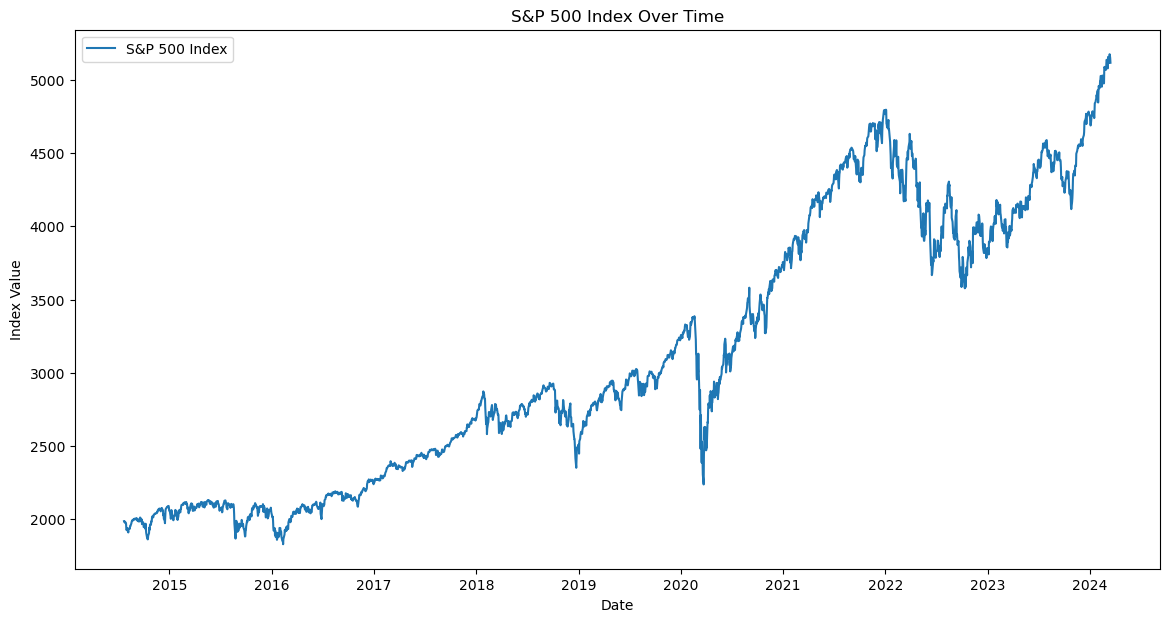

In [45]:
import matplotlib.pyplot as plt

# Plotting the S&P 500 index over time
plt.figure(figsize=(14, 7))
plt.plot(df_sp500_full.index, df_sp500_full['S&P500'], label='S&P 500 Index')
plt.title('S&P 500 Index Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.show()

---

## Findings for Volume Analysis
Trading volume has been highly volatile, with peaks in activity especially during 2020. These spikes may show increased market activity during periods of significant events, such as the pandemic.

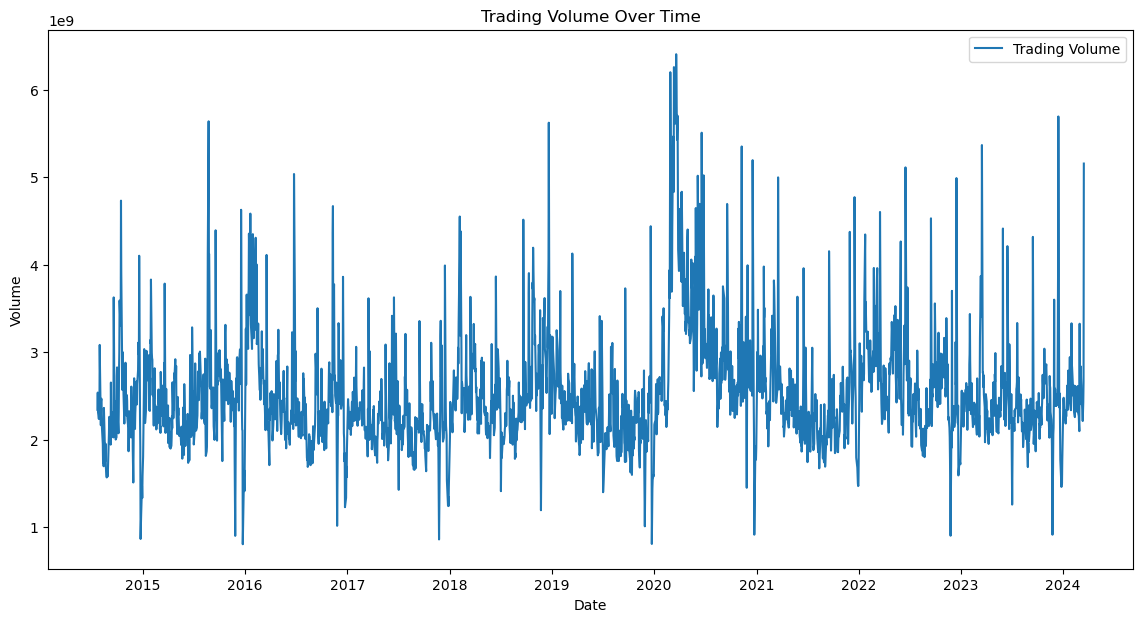

In [46]:
# Plotting the aggregated trading volume over time
plt.figure(figsize=(14, 7))
plt.plot(df_sp500_full.index, df_sp500_full['Volume'], label='Trading Volume')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

---

## Findings for Momentum Indicators
The MACD indicators, which help identify trend direction and momentum, shows high volatility with significant lows in 2020. This suggests periods of market uncertainty during these times.

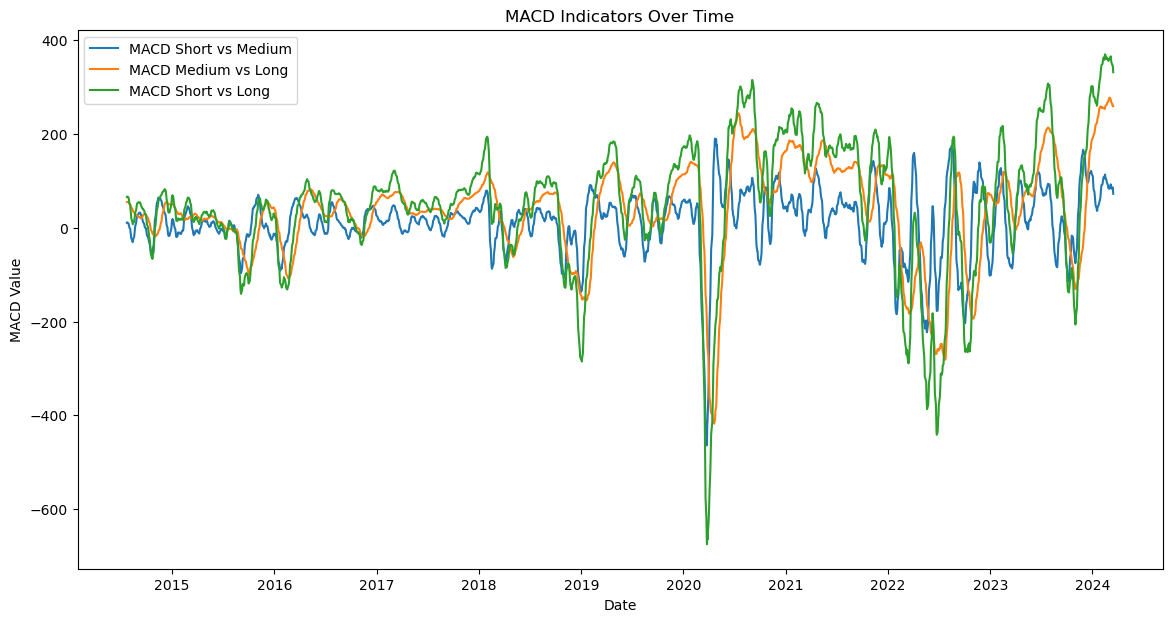

In [47]:
# Plotting MACD indicators
plt.figure(figsize=(14, 7))
plt.plot(df_sp500_full.index, df_sp500_full['MACD_short_medium'], label='MACD Short vs Medium')
plt.plot(df_sp500_full.index, df_sp500_full['MACD_medium_long'], label='MACD Medium vs Long')
plt.plot(df_sp500_full.index, df_sp500_full['MACD_short_long'], label='MACD Short vs Long')
plt.title('MACD Indicators Over Time')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.show()

---

## Findings for Volume Oscillator
The Volume Oscillator, which shows short-term vs. long-term volume trends, also displayed large movements in 2020.  This implies shifts in trading activity and the overall market sentiment.

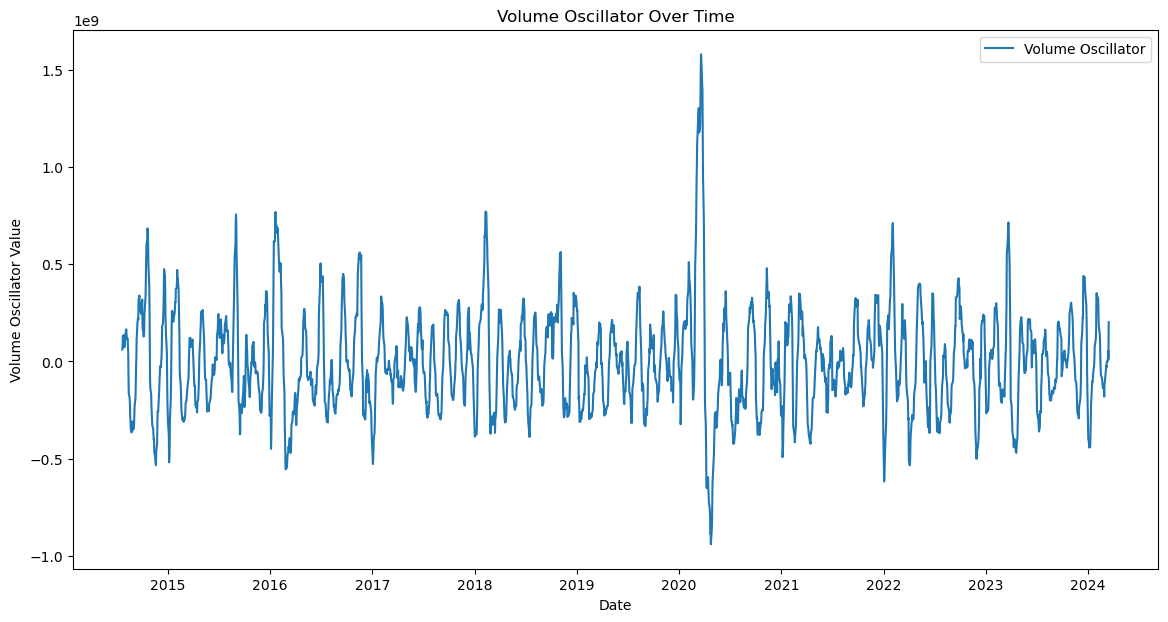

In [48]:
# Plotting the Volume Oscillator
plt.figure(figsize=(14, 7))
plt.plot(df_sp500_full.index, df_sp500_full['Volume_Oscillator'], label='Volume Oscillator')
plt.title('Volume Oscillator Over Time')
plt.xlabel('Date')
plt.ylabel('Volume Oscillator Value')
plt.legend()
plt.show()

---

# Correlations

In [49]:
# Check for correlations between the attributes using sns.pairplot
#sns.pairplot(df_sp500_full)

In [50]:
# Correlate the attributes in a matrix
correlation_matrix = df_sp500_full.corr(numeric_only=True)
correlation_matrix

,S&P500,10d_SMA,30d_SMA,90d_SMA,MACD_short_medium,MACD_medium_long,MACD_short_long,Volume,10d_Volume_MA,30d_Volume_MA,Market_Direction,OBV,Volume_Oscillator
S&P500,1.000000,0.998123,0.993902,0.985302,0.170745,0.243042,0.264413,-0.006798,-0.007323,0.012373,0.014626,0.952360,-0.032072
10d_SMA,0.998123,1.000000,0.997134,0.988278,0.153263,0.245780,0.257801,0.009752,-0.001945,0.009408,-0.006604,0.952723,-0.017890
30d_SMA,0.993902,0.997134,1.000000,0.993480,0.078065,0.226306,0.206214,0.031909,0.028327,0.020875,-0.008745,0.953066,0.018821
90d_SMA,0.985302,0.988278,0.993480,1.000000,0.046519,0.113780,0.107272,0.055893,0.067336,0.072022,-0.010589,0.950952,0.010442
MACD_short_medium,0.170745,0.153263,0.078065,0.046519,1.000000,0.282836,0.703696,-0.288296,-0.395633,-0.148690,0.027203,0.105885,-0.481600
MACD_medium_long,0.243042,0.245780,0.226306,0.113780,0.282836,1.000000,0.880521,-0.199469,-0.328452,-0.433430,0.014265,0.180653,0.074793
MACD_short_long,0.264413,0.257801,0.206214,0.107272,0.703696,0.880521,1.000000,-0.290228,-0.438816,-0.394542,0.024010,0.186146,-0.182597
Volume,-0.006798,0.009752,0.031909,0.055893,-0.288296,-0.199469,-0.290228,1.000000,0.688724,0.560735,-0.098365,0.094723,0.376156
10d_Volume_MA,-0.007323,-0.001945,0.028327,0.067336,-0.395633,-0.328452,-0.438816,0.688724,1.000000,0.830305,0.007435,0.128378,0.521453
30d_Volume_MA,0.012373,0.009408,0.020875,0.072022,-0.148690,-0.433430,-0.394542,0.560735,0.830305,1.000000,0.009429,0.160362,-0.042577


In [51]:
# Now only relate attributes to the S&P500
correlation_matrix["S&P500"].sort_values(ascending=False)

S&P500               1.000000
10d_SMA              0.998123
30d_SMA              0.993902
90d_SMA              0.985302
OBV                  0.952360
MACD_short_long      0.264413
MACD_medium_long     0.243042
MACD_short_medium    0.170745
Market_Direction     0.014626
30d_Volume_MA        0.012373
Volume              -0.006798
10d_Volume_MA       -0.007323
Volume_Oscillator   -0.032072
Name: S&P500, dtype: float64

# Prepare Data for Modeling
(Scaling, Encoding, etc )

In [52]:
# Check for missing values
df_sp500_full.isna().sum()
#> No missing values found

S&P500               0
10d_SMA              0
30d_SMA              0
90d_SMA              0
MACD_short_medium    0
MACD_medium_long     0
MACD_short_long      0
Volume               0
10d_Volume_MA        0
30d_Volume_MA        0
Market_Direction     0
OBV                  0
Volume_Oscillator    0
dtype: int64

In [53]:
# Check for duplicate rows
df_sp500_full.duplicated().sum()
#> No duplicates found

0

# Pipeline
1. Scale the numerical columns with StandardScaler
2. Encode any categorical columns with OneHotEncoder

In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#create the categorical and numerical columns
num_cols = df_sp500_full.select_dtypes(include='number').columns.to_list()
cat_cols = df_sp500_full.select_dtypes(exclude='number').columns.to_list()
num_cols.remove("S&P500") # exclude the target

#create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(sparse_output=False))

# Set the estimators and transformations using ColumnTransformer
preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

# Display the full pipeline
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['10d_SMA', '30d_SMA', '90d_SMA',
                                  'MACD_short_medium', 'MACD_medium_long',
                                  'MACD_short_long', 'Volume', '10d_Volume_MA',
                                  '30d_Volume_MA', 'Market_Direction', 'OBV',
                                  'Volume_Oscillator']),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 [])])

## Split target and features

In [55]:
# Target
target_label = "S&P500"
y = df_sp500_full[target_label].reset_index()
y = y[target_label]

y

0       1987.01
1       1987.98
2       1978.34
3       1978.91
4       1969.95
         ...   
2424    5117.94
2425    5175.27
2426    5165.31
2427    5150.48
2428    5117.09
Name: S&P500, Length: 2429, dtype: float64

In [56]:
# Features
feature_names = df_sp500_full.columns.to_list()[1:] # list of column labels (excluding the target)
X = df_sp500_full[feature_names]

X

,10d_SMA,30d_SMA,90d_SMA,MACD_short_medium,MACD_medium_long,MACD_short_long,Volume,10d_Volume_MA,30d_Volume_MA,Market_Direction,OBV,Volume_Oscillator
Date,,,,,,,,,,,,
2014-07-23,1974.471,1963.735667,1908.897333,10.735333,54.838333,65.573667,2.340862e+09,2.305126e+09,2.243913e+09,1.0,4.488740e+10,6.121326e+07
2014-07-24,1976.801,1965.205333,1910.332333,11.595667,54.873000,66.468667,2.537793e+09,2.346201e+09,2.261311e+09,1.0,4.742519e+10,8.488993e+07
2014-07-25,1977.878,1966.813000,1911.511111,11.065000,55.301889,66.366889,2.312308e+09,2.390849e+09,2.259928e+09,-1.0,4.511289e+10,1.309215e+08
2014-07-28,1978.059,1968.238000,1912.823778,9.821000,55.414222,65.235222,2.235974e+09,2.402401e+09,2.266672e+09,1.0,4.734886e+10,1.357297e+08
2014-07-29,1977.726,1969.310333,1913.912000,8.415667,55.398333,63.814000,2.305776e+09,2.379022e+09,2.272497e+09,-1.0,4.504308e+10,1.065256e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-11,5109.464,5026.273667,4761.557111,83.190333,264.716556,347.906889,2.212667e+09,2.527104e+09,2.528025e+09,-1.0,3.287279e+11,-9.207970e+05
2024-03-12,5119.173,5034.518333,4772.462333,84.654667,262.056000,346.710667,2.320705e+09,2.543175e+09,2.527502e+09,1.0,3.310486e+11,1.567355e+07
2024-03-13,5128.728,5042.529667,4782.767333,86.198333,259.762333,345.960667,2.426582e+09,2.576152e+09,2.521203e+09,-1.0,3.286220e+11,5.494928e+07


In [57]:
# Apply the preprocessing pipeline to the dataset
X_prepared = preprocessing.fit_transform(X)

# Add the column headers back
feature_names = preprocessing.get_feature_names_out()
X_prepared = pd.DataFrame(data=X_prepared, columns=feature_names)
X_prepared

,num__10d_SMA,num__30d_SMA,num__90d_SMA,num__MACD_short_medium,num__MACD_medium_long,num__MACD_short_long,num__Volume,num__10d_Volume_MA,num__30d_Volume_MA,num__Market_Direction,num__OBV,num__Volume_Oscillator
0,-1.240984,-1.249693,-1.295627,-0.029987,0.179248,0.117958,-0.299235,-0.473175,-0.701284,0.932491,-1.184731,0.225452
1,-1.238429,-1.248067,-1.294007,-0.017555,0.179582,0.124349,0.009141,-0.387034,-0.658562,0.932491,-1.162592,0.314466
2,-1.237248,-1.246289,-1.292677,-0.025224,0.183717,0.123623,-0.343947,-0.293401,-0.661960,-1.072840,-1.182764,0.487524
3,-1.237050,-1.244712,-1.291196,-0.043200,0.184800,0.115541,-0.463479,-0.269175,-0.645400,0.932491,-1.163258,0.505601
4,-1.237415,-1.243526,-1.289968,-0.063508,0.184646,0.105392,-0.354176,-0.318203,-0.631096,-1.072840,-1.183373,0.395807
...,...,...,...,...,...,...,...,...,...,...,...,...
2424,2.196730,2.138350,1.923246,1.017024,2.202595,2.134166,-0.499975,-0.007655,-0.003644,-1.072840,1.291469,-0.008145
2425,2.207377,2.147471,1.935551,1.038185,2.176946,2.125623,-0.330799,0.026048,-0.004928,0.932491,1.311715,0.054243
2426,2.217854,2.156333,1.947179,1.060491,2.154834,2.120267,-0.165005,0.095205,-0.020395,-1.072840,1.290545,0.201902
2427,2.223799,2.167574,1.957619,0.991996,2.163595,2.092908,0.203996,-0.043845,-0.075045,-1.072840,1.267320,0.036297


# Create and Train the Model

In [58]:
from sklearn.model_selection import train_test_split



# Split into 80% training and 20% testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1943, 12) (1943,) (486, 12) (486,)


## S&P 500 Price Prediction using Simple Moving Averages (SMA)


In [59]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)

Train Score: 0.9972904767439761
Test Score: 0.9973145986419958


### Evaluation Metrics

In [60]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


# Calculate MAE
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Calculate MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Calculate RMSE
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Calculate R-squared (R2) scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MAE:", train_mae)
print("Test MAE:", test_mae)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R-squared (R2) Score:", train_r2)
print("Test R-squared (R2) Score:", test_r2)


Train MAE: 33.176627971663954
Test MAE: 33.62357822586385
Train MSE: 2223.1031035332544
Test MSE: 2448.343825653134
Train RMSE: 47.14979431061449
Test RMSE: 49.48074196748806
Train R-squared (R2) Score: 0.9972904767439761
Test R-squared (R2) Score: 0.9973145986419958


### Visualisation

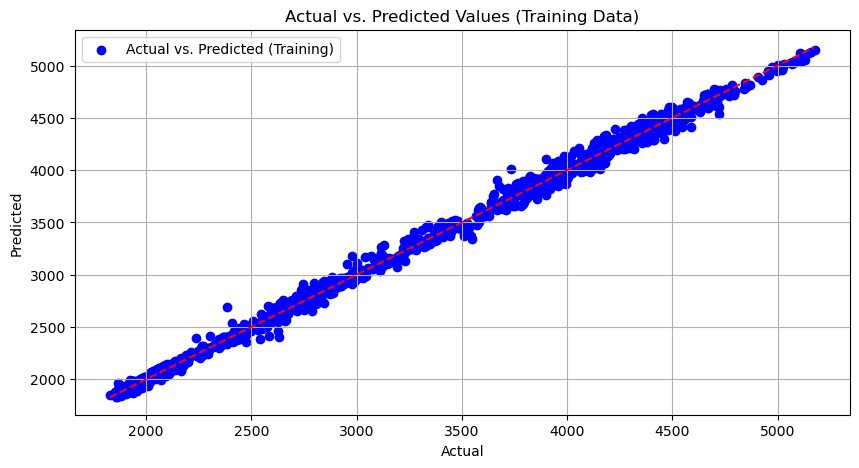

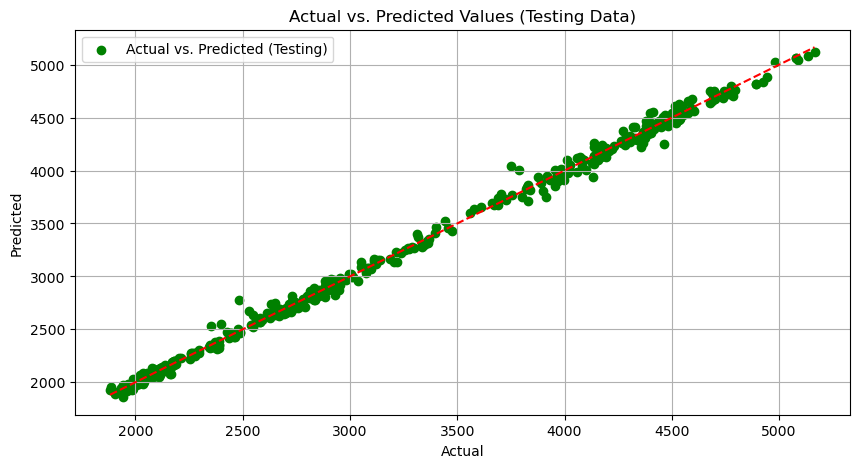

In [61]:
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_pred, color='blue', label='Actual vs. Predicted (Training)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Training Data)')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for testing data
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, color='green', label='Actual vs. Predicted (Testing)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Testing Data)')
plt.legend()
plt.grid(True)
plt.show()

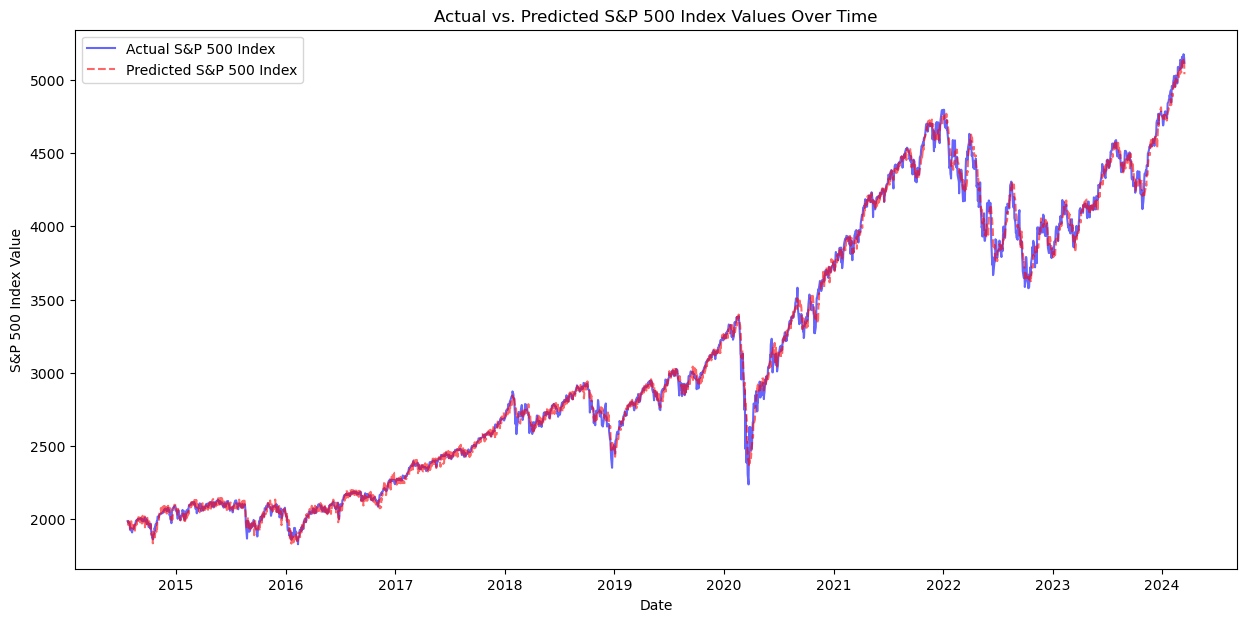

In [68]:
train_dates = X_train.index
test_dates = X_test.index

# Create two DataFrames for training and testing predictions with the dates
df_train_pred = pd.DataFrame({'Date': train_dates, 'Actual': y_train, 'Predicted': y_train_pred}).set_index('Date')
df_test_pred = pd.DataFrame({'Date': test_dates, 'Actual': y_test, 'Predicted': y_test_pred}).set_index('Date')

# Concatenate the training and testing prediction DataFrames
df_full_pred = pd.concat([df_train_pred, df_test_pred])

# Sorting the DataFrame by Date to ensure the plot is in chronological order
df_full_pred = df_full_pred.sort_index()

# Plotting Actual vs. Predicted S&P 500 Index Values Over Time
plt.figure(figsize=(15, 7))
plt.plot(df_full_pred.index, df_full_pred['Actual'], label='Actual S&P 500 Index', color='blue', alpha=0.6)
plt.plot(df_full_pred.index, df_full_pred['Predicted'], label='Predicted S&P 500 Index', color='red', linestyle='--', alpha=0.6)
plt.title('Actual vs. Predicted S&P 500 Index Values Over Time')
plt.xlabel('Date')
plt.ylabel('S&P 500 Index Value')
plt.legend()
plt.show()